# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#cit = cities
units = 'Imperial'
counts = 1

city_df = pd.DataFrame()

city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Wind Speed'] = ""


#or cit,row in city_df.iterrows():
for cit in cities:    
    
    query_url = url + "appid=" + weather_api_key + "&q=" + cit + "&units=" + units
    weather = requests.get(query_url)
    weatherjson = weather.json()
       
    try:
        country = weatherjson['sys']['country']
        city_df.loc[cit,'Country'] = country
    except:
        city_df.loc[cit,'Country'] = ""
    
    try:
        max_temp = weatherjson['main']['temp_max']
        city_df.loc[cit,'Max Temp'] = max_temp
    except:
        city_df.loc[cit,'Max Temp'] = ""
    
    try:
        clouds = weatherjson['clouds']['all']
        city_df.loc[cit,'Cloudiness'] = clouds
    except:
        city_df.loc[cit,'Cloudiness'] = ""
    
    try:
        windspeed = weatherjson['wind']['speed']
        city_df.loc[cit,'Wind Speed'] = windspeed
    except:
        city_df.loc[cit,'Wind Speed'] = ""
    
    try:
        humidity = weatherjson['main']['humidity']
        city_df.loc[cit,'Humidity'] = humidity
    except:
        city_df.loc[cit,'Humidity'] = ""
    
    try:
        lat = weatherjson['coord']['lat']
        city_df.loc[cit,'Lat'] = lat
    except:
        city_df.loc[cit,'Lat'] = ""
    
    try:
        lon = weatherjson['coord']['lon']
        city_df.loc[cit,'Lng'] = lon
    except:
        city_df.loc[cit,'Lng'] = ""
    
    print(f'The city is {cit}. This is city {counts} of {len(cities)}')
    counts = counts + 1 
    

The city is rikitea. This is city 1 of 626
The city is norman wells. This is city 2 of 626
The city is barrow. This is city 3 of 626
The city is carballo. This is city 4 of 626
The city is beringovskiy. This is city 5 of 626
The city is tuktoyaktuk. This is city 6 of 626
The city is bathsheba. This is city 7 of 626
The city is constitucion. This is city 8 of 626
The city is souillac. This is city 9 of 626
The city is zalantun. This is city 10 of 626
The city is nizhneyansk. This is city 11 of 626
The city is aklavik. This is city 12 of 626
The city is palmer. This is city 13 of 626
The city is punta arenas. This is city 14 of 626
The city is ayios thomas. This is city 15 of 626
The city is avarua. This is city 16 of 626
The city is atuona. This is city 17 of 626
The city is mataura. This is city 18 of 626
The city is cap malheureux. This is city 19 of 626
The city is vardo. This is city 20 of 626
The city is port alfred. This is city 21 of 626
The city is hermanus. This is city 22 of 6

The city is soyo. This is city 181 of 626
The city is leshukonskoye. This is city 182 of 626
The city is nabire. This is city 183 of 626
The city is rio gallegos. This is city 184 of 626
The city is saskylakh. This is city 185 of 626
The city is poopo. This is city 186 of 626
The city is ajaigarh. This is city 187 of 626
The city is leningradskiy. This is city 188 of 626
The city is tias. This is city 189 of 626
The city is shimoda. This is city 190 of 626
The city is grindavik. This is city 191 of 626
The city is zelenyy bor. This is city 192 of 626
The city is tuatapere. This is city 193 of 626
The city is plettenberg bay. This is city 194 of 626
The city is severo-kurilsk. This is city 195 of 626
The city is tamworth. This is city 196 of 626
The city is sumbawa. This is city 197 of 626
The city is namibe. This is city 198 of 626
The city is leh. This is city 199 of 626
The city is porosozero. This is city 200 of 626
The city is quatre cocos. This is city 201 of 626
The city is anlog

The city is muyezerskiy. This is city 358 of 626
The city is aden. This is city 359 of 626
The city is la ronge. This is city 360 of 626
The city is turinsk. This is city 361 of 626
The city is yankton. This is city 362 of 626
The city is teul. This is city 363 of 626
The city is belmonte. This is city 364 of 626
The city is adra. This is city 365 of 626
The city is karakendzha. This is city 366 of 626
The city is abai. This is city 367 of 626
The city is paso de carrasco. This is city 368 of 626
The city is bolungarvik. This is city 369 of 626
The city is ostrovnoy. This is city 370 of 626
The city is pisco. This is city 371 of 626
The city is romitan. This is city 372 of 626
The city is alihe. This is city 373 of 626
The city is pacific grove. This is city 374 of 626
The city is kedrovka. This is city 375 of 626
The city is sulangan. This is city 376 of 626
The city is vaitape. This is city 377 of 626
The city is cururupu. This is city 378 of 626
The city is altar. This is city 379 o

The city is bayanday. This is city 538 of 626
The city is jijiga. This is city 539 of 626
The city is sao joao da barra. This is city 540 of 626
The city is sibolga. This is city 541 of 626
The city is morondava. This is city 542 of 626
The city is saint-leu. This is city 543 of 626
The city is inongo. This is city 544 of 626
The city is opuwo. This is city 545 of 626
The city is san andres. This is city 546 of 626
The city is podor. This is city 547 of 626
The city is mawlaik. This is city 548 of 626
The city is fiumicino. This is city 549 of 626
The city is daru. This is city 550 of 626
The city is juneau. This is city 551 of 626
The city is mogocha. This is city 552 of 626
The city is lansing. This is city 553 of 626
The city is lagoa. This is city 554 of 626
The city is klaksvik. This is city 555 of 626
The city is tautira. This is city 556 of 626
The city is port lincoln. This is city 557 of 626
The city is doha. This is city 558 of 626
The city is cayenne. This is city 559 of 626

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df.to_csv("cities.csv",index = True)
city_df.head()

,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
rikitea,4,PF,76,-23.12,-134.97,77.65,12.12
norman wells,90,CA,70,65.28,-126.83,-5.8,13.87
barrow,1,US,95,71.29,-156.79,-29.2,9.17
carballo,40,ES,100,43.21,-8.69,55,6.93
beringovskiy,100,RU,95,63.05,179.32,26.22,21.68


In [5]:
#Converting everything to numerical values for plots,
city_df.dropna()
city_df['Lat'] = pd.to_numeric(city_df['Lat'])
city_df['Lng'] = pd.to_numeric(city_df['Lng'])
city_df['Max Temp'] = pd.to_numeric(city_df['Max Temp'])
city_df['Wind Speed'] = pd.to_numeric(city_df['Wind Speed'])
city_df['Cloudiness'] = pd.to_numeric(city_df['Cloudiness'])
city_df['Humidity'] = pd.to_numeric(city_df['Humidity'])


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

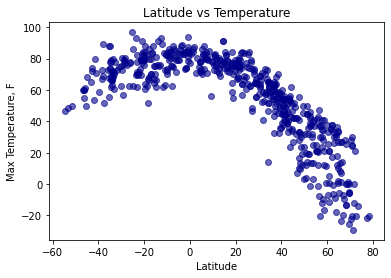

In [6]:
lat = city_df['Lat']
temp = city_df['Max Temp']
plt.scatter(lat,temp, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature, F')
plt.title('Latitude vs Temperature')
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

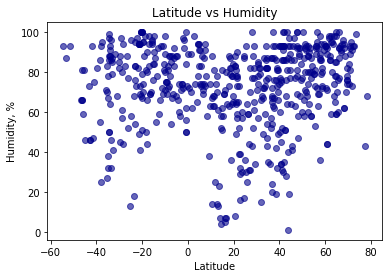

In [7]:
lat = city_df["Lat"]
hum = city_df['Humidity']
plt.scatter(lat,hum, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Humidity, %')
plt.title('Latitude vs Humidity')
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

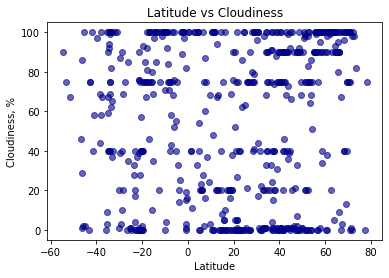

In [8]:
lat = city_df["Lat"]
clds = city_df['Cloudiness']
plt.scatter(lat,clds, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness, %')
plt.title('Latitude vs Cloudiness')
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

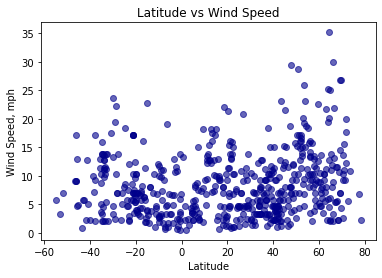

In [9]:
lat = city_df["Lat"]
wspd = city_df['Wind Speed']
plt.scatter(lat,wspd, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed, mph')
plt.title('Latitude vs Wind Speed')
plt.show

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy import stats
def linreg(x_values,y_values):
    #The ‘linregress’ outputs 5 items (slope, intercept, rvalue, pvalue, stderr)
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.annotate(line_eq,(0,0),fontsize=15,color="red")

    # Print r square value
    print(f"The r-squared is: {rvalue}")

    # Show plot
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
Ncity = city_df.loc[city_df['Lat']>=0,:]
Scity = city_df.loc[city_df['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8832260224015589


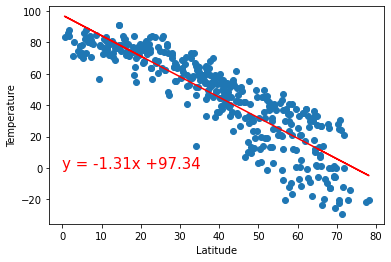

In [12]:
nLat = Ncity['Lat']
nTemp = Ncity['Max Temp']
linreg(nLat,nTemp)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5471774256306363


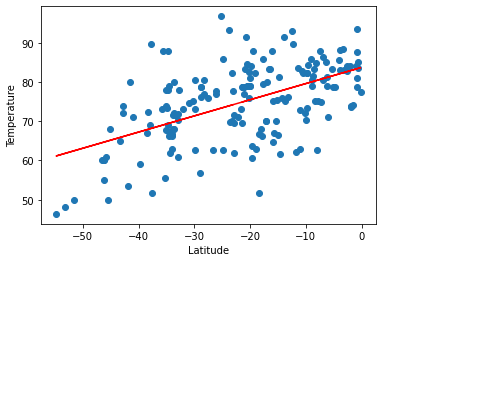

In [13]:
sLat = Scity['Lat']
sTemp = Scity['Max Temp']
linreg(sLat,sTemp)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2969352355114659


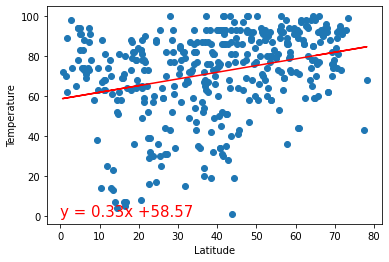

In [14]:
nLat = Ncity['Lat']
nHum = Ncity['Humidity']
linreg(nLat,nHum)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1368978732086664


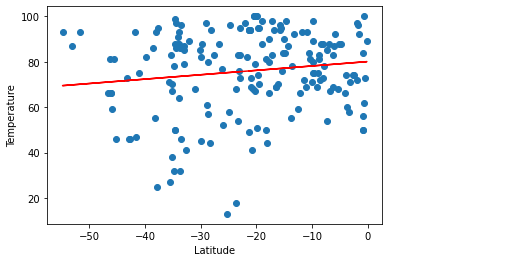

In [15]:
sLat = Scity['Lat']
sHum = Scity['Humidity']
linreg(sLat,sHum)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2956875642333198


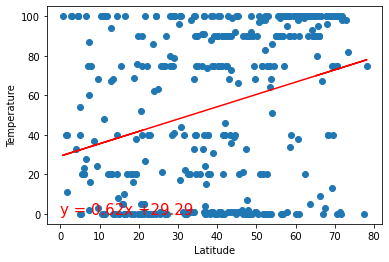

In [16]:
nLat = Ncity['Lat']
nCld = Ncity['Cloudiness']
linreg(nLat,nCld)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0865467047264311


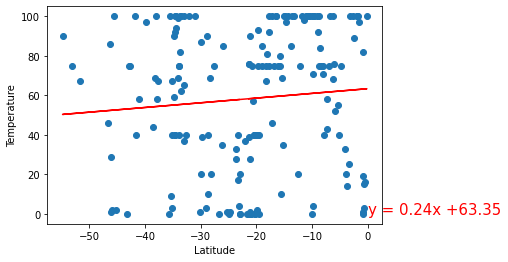

In [17]:
sLat = Scity['Lat']
sCld = Scity['Cloudiness']
linreg(sLat,sCld)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.24368504813735


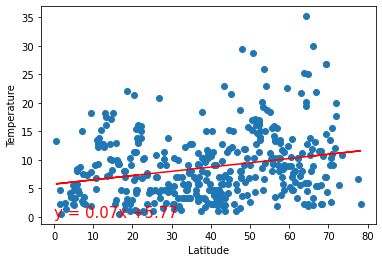

In [18]:
nLat = Ncity['Lat']
nSpd = Ncity['Wind Speed']
linreg(nLat,nSpd)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.22849875702588057


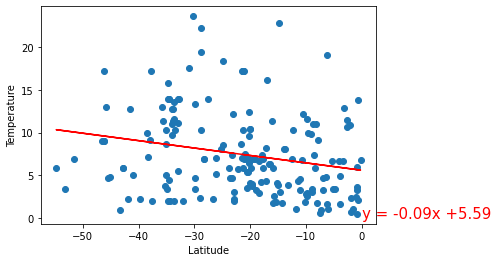

In [19]:
sLat = Scity['Lat']
sSpd = Scity['Wind Speed']
linreg(sLat,sSpd)